<a href="https://colab.research.google.com/github/IsuruUdara2001/DL-Labsheet_02/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualize the dataset

Target labels:  [7 7 3 3 2 9 7 5 1 8]


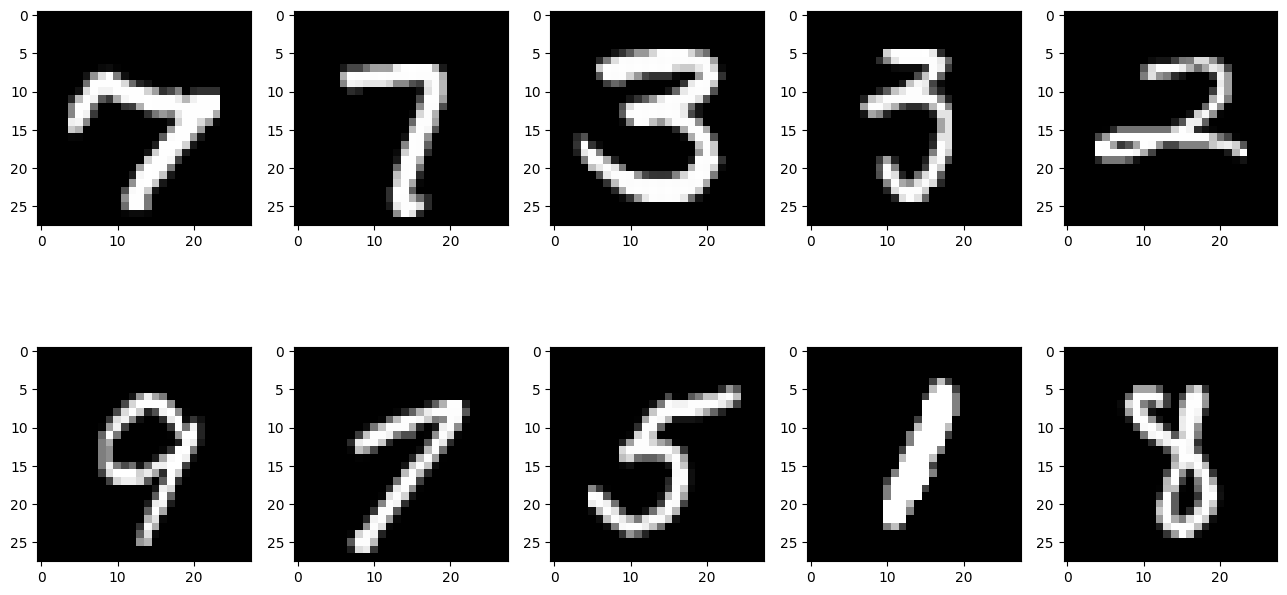

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8404 - loss: 0.5097
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9606 - loss: 0.1305
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9710 - loss: 0.0933
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0713
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0558


Plot the loss and accuracy graphs

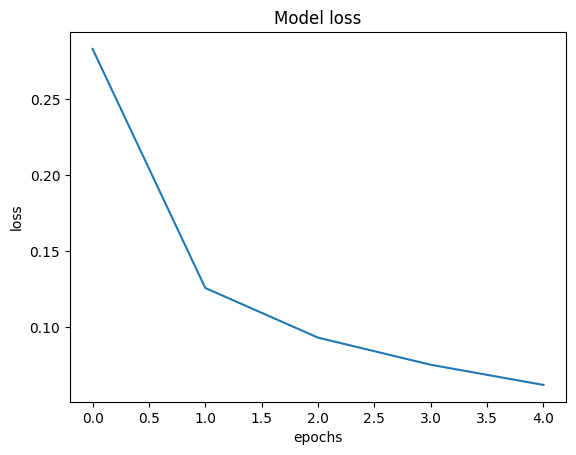

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

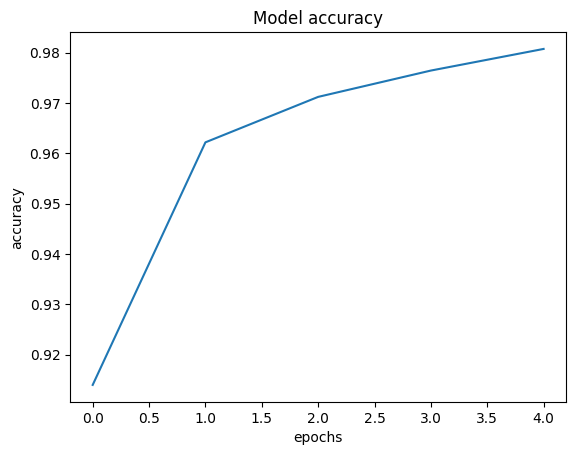

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9644 - loss: 0.1202
Loss of the Test dataset is: 0.10078562796115875
Accuracy of the test dataset is: 0.9700999855995178


Save the model weights

In [11]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

## Build MLP model with hyperparameters and L1/L2 regularization

In [12]:
from tensorflow.keras import regularizers, optimizers

# Hyperparameters
learning_rate = 0.001
batch_size = 128
epochs = 15
l1_reg = 1e-6
l2_reg = 1e-4

# One-hot encode targets
train_target_cat = to_categorical(train_target)
test_target_cat = to_categorical(test_target)

# Normalize data
train_data_norm = train_data.astype('float32') / 255.0
test_data_norm = test_data.astype('float32') / 255.0

# Build model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dense(10, activation='softmax'))

# Compile model
opt = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data_norm, train_target_cat,
                    validation_split=0.1,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2)

Epoch 1/15
422/422 - 9s - 20ms/step - accuracy: 0.9301 - loss: 0.3334 - val_accuracy: 0.9680 - val_loss: 0.1966
Epoch 2/15
422/422 - 6s - 14ms/step - accuracy: 0.9721 - loss: 0.1752 - val_accuracy: 0.9735 - val_loss: 0.1663
Epoch 3/15
422/422 - 10s - 25ms/step - accuracy: 0.9801 - loss: 0.1420 - val_accuracy: 0.9768 - val_loss: 0.1548
Epoch 4/15
422/422 - 7s - 17ms/step - accuracy: 0.9850 - loss: 0.1211 - val_accuracy: 0.9758 - val_loss: 0.1521
Epoch 5/15
422/422 - 6s - 14ms/step - accuracy: 0.9875 - loss: 0.1091 - val_accuracy: 0.9778 - val_loss: 0.1395
Epoch 6/15
422/422 - 7s - 17ms/step - accuracy: 0.9886 - loss: 0.1015 - val_accuracy: 0.9820 - val_loss: 0.1303
Epoch 7/15
422/422 - 9s - 21ms/step - accuracy: 0.9902 - loss: 0.0930 - val_accuracy: 0.9780 - val_loss: 0.1311
Epoch 8/15
422/422 - 10s - 24ms/step - accuracy: 0.9911 - loss: 0.0886 - val_accuracy: 0.9807 - val_loss: 0.1241
Epoch 9/15
422/422 - 10s - 24ms/step - accuracy: 0.9915 - loss: 0.0833 - val_accuracy: 0.9827 - val_lo

## Plot training curves

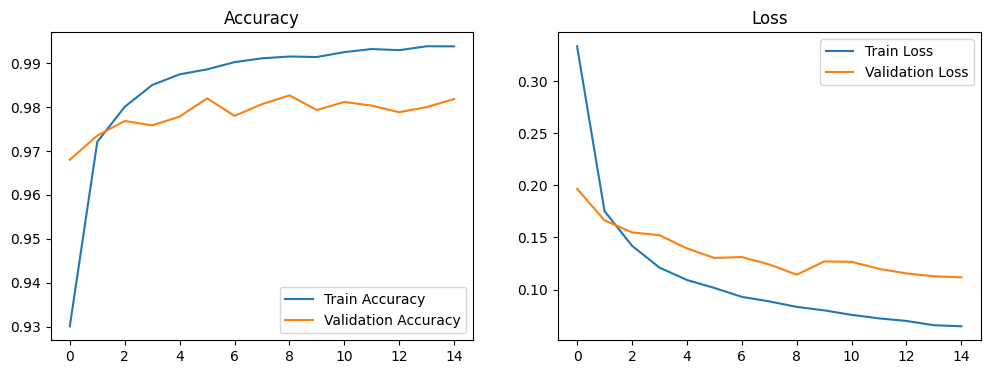

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

## Evaluate model and show confusion matrix

Test accuracy: 0.9787, Test loss: 0.1158
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


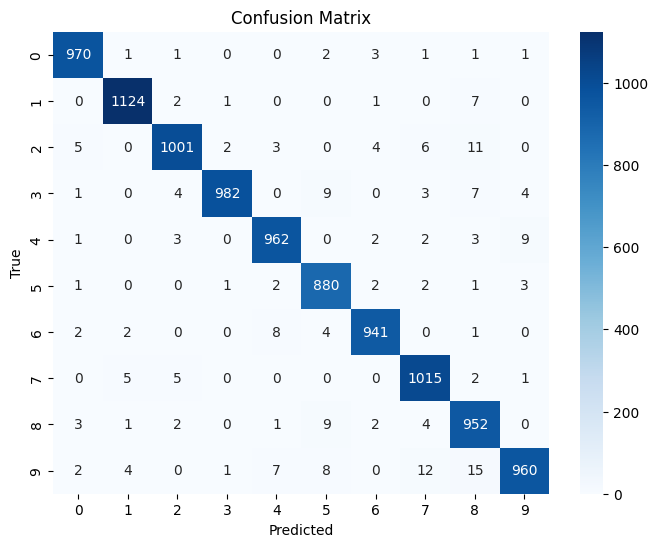

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.95      0.98      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate
test_loss, test_acc = model.evaluate(test_data_norm, test_target_cat, verbose=0)
print(f'Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}')

# Predictions
y_pred = model.predict(test_data_norm)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(test_target, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(test_target, y_pred_classes))